In [1]:
import numpy as np
import skimage
import skimage.data
import skimage.io
import skimage.future
import skimage.segmentation
import sklearn.cluster
import cv2

# for displaying images in jupyter
from matplotlib import pyplot as plt

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]
#mpl.rcParams['figure.dpi']= 400

In [2]:
image = cv2.imread('IMG_7446.jpg')

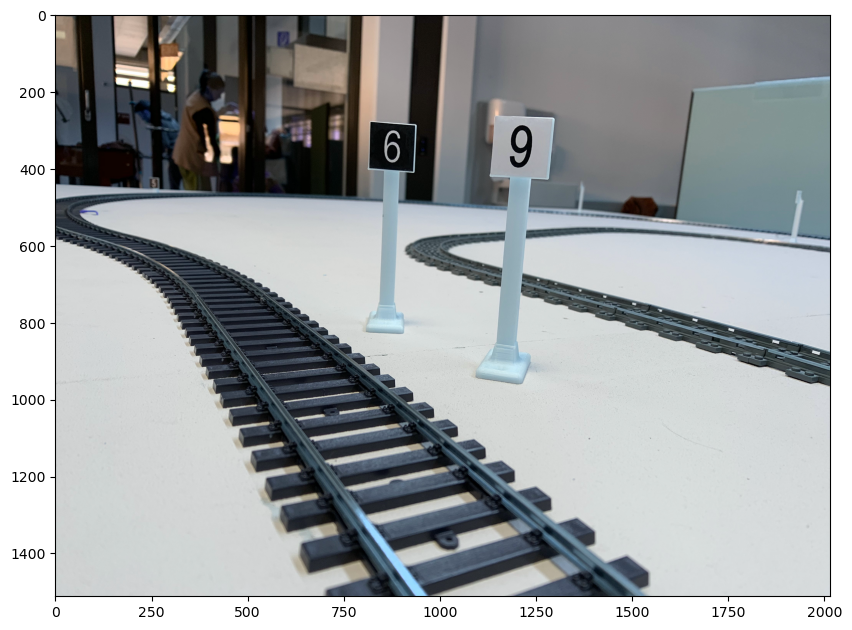

In [3]:
plt.imshow(image)

In [4]:
sub = image[200:500, 200:1500]
sub_gray = cv2.cvtColor(sub, cv2.COLOR_RGB2GRAY)

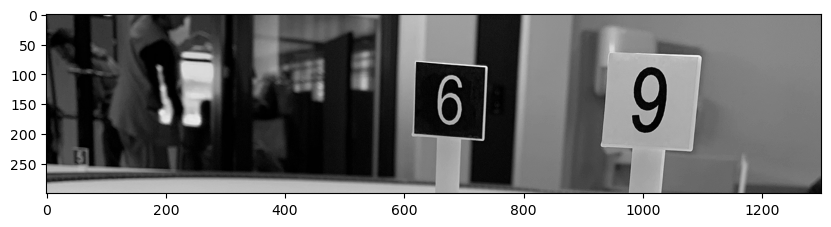

In [5]:
plt.imshow(sub_gray, cmap='gray')

In [6]:
integral_image = cv2.integral(sub_gray)

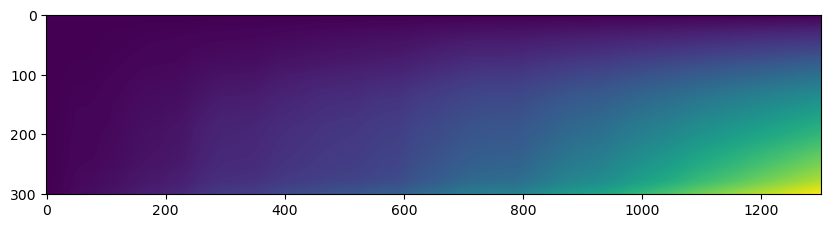

In [7]:
plt.imshow(integral_image)

In [8]:
def haar_feature(integral_image: np.ndarray, height:int, width:int, row:int, col:int):
    # sum = C + A - B - D
    # see https://en.wikipedia.org/wiki/Haar-like_feature
    c = integral_image[row+height, col+width]
    a = integral_image[row, col]
    b = integral_image[row, col+width]
    d = integral_image[row+height, col]
    return c + a - b - d

In [9]:
def find_rect(integral_image: np.ndarray, height: int, width: int):
    max_value = 0
    max_position = (0,0)
    for row in range(integral_image.shape[0] - height - 1):
        for col in range(integral_image.shape[1] - width - 1):
            value = haar_feature(integral_image, height, width, row, col)
            if value > max_value:
                max_value = value
                max_position = (row, col)
    return max_position


In [10]:
height = 150
width = 150
pos = find_rect(integral_image, height, width)

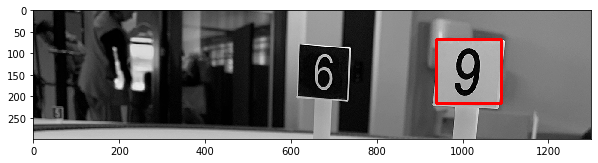

In [14]:
# display result
displayed_image = cv2.cvtColor(sub_gray, cv2.COLOR_GRAY2RGB)
# OpenCV wants the position in x and y, which is different as row, col
pos_xy = (pos[1], pos[0])
pos2_xy = (pos[1]+width, pos[0]+height)
cv2.rectangle(displayed_image, pos_xy, pos2_xy, (255, 0,0), 5)
plt.rcParams['figure.figsize'] = [10, 20]
plt.imshow(displayed_image)

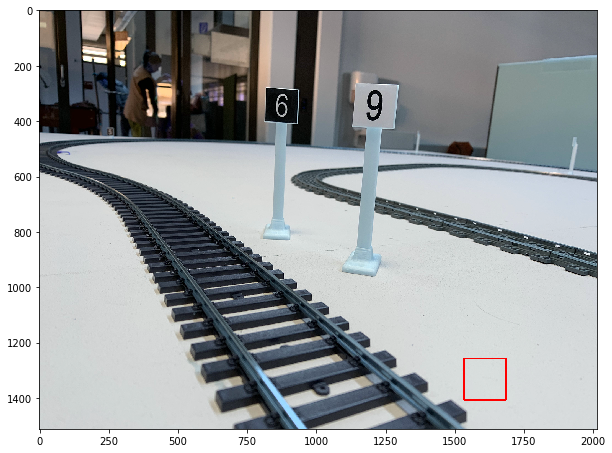

In [15]:
# try to find in the full image, but there will be too much white areas
full_integral_image = cv2.integral(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY))
height = 150
width = 150
pos = find_rect(full_integral_image, height, width)
# display result
displayed_image = image.copy()
# OpenCV wants the position in x and y, which is different as row, col
pos_xy = (pos[1], pos[0])
pos2_xy = (pos[1]+width, pos[0]+height)
cv2.rectangle(displayed_image, pos_xy, pos2_xy, (255, 0,0), 5)
plt.rcParams['figure.figsize'] = [10, 20]
plt.imshow(displayed_image)